# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.154628e+01     7.699273e+00
 * time: 0.004797220230102539
     1     2.800221e+01     6.440345e+00
 * time: 0.013971090316772461
     2     2.243864e+01     6.020620e+00
 * time: 0.03727412223815918
     3     1.462494e+01     2.953810e+00
 * time: 0.06394720077514648
     4     1.174522e+01     1.365491e+00
 * time: 0.08650922775268555
     5     1.136493e+01     1.744789e+00
 * time: 0.10426902770996094
     6     1.062668e+01     1.174672e+00
 * time: 0.1218712329864502
     7     1.018652e+01     1.270070e+00
 * time: 0.14326214790344238
     8     9.957414e+00     6.355245e-01
 * time: 0.1628861427307129
     9     9.926670e+00     8.326376e-01
 * time: 0.17653822898864746
    10     9.910968e+00     7.783849e-01
 * time: 0.1907961368560791
    11     9.811621e+00     5.507878e-01
 * time: 0.21181821823120117
    12     9.716849e+00     6.240345e-01
 * time: 0.3242311477661133
    13     9.619192e+00     4.933643e-01
 * time: 0

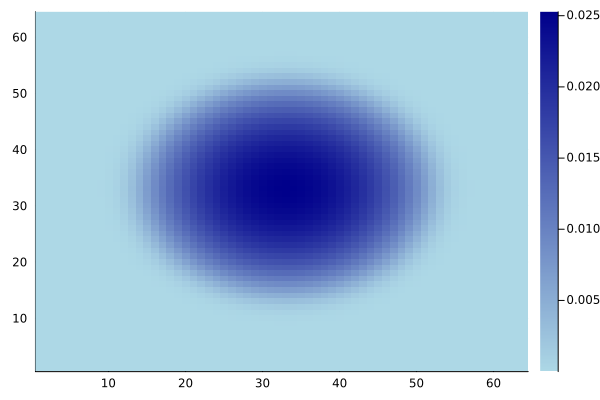

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)